<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="timeseries.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=24px>
                    <b> Forecasting the Sales of a Furniture Store
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**We are using Superstore sales data for furniture sales between 2014 to 2017 and apply a simple model to forecast for 2018**

## Content

1. **[Import packages](#import_packages)**
2. **[Load data](#load_data)**
3. **[Data preparation](#data_preparation)**
    - 3.1 - [Dimensions of Dataset](#data_dimension)
    - 3.2 - [Statistical Summary](#Stat_sum)
    - 3.3 - [Checking Data Type and Missing Values](#check_data_type)
    - 3.4 - [Indexing with Date](#Indexing_with_Date)
4. **[Time Series Analysis](#Time_Series_Analysis)**
    - 4.1 - [Visualizing data](#Visualizing_data)
    - 4.2 - [Sampling](#Sampling)
    - 4.3 - [Checking Stationarity](#Checking_Stationarity)
    - 4.4 - [Decomposing](#Decomposing)
5. **[Time Series Forcasting using ARIMA](#Time_Series_Forcasting_using_ARIMA)**
    - 5.1 - [Parameter Selection](#Parameter_Selection)
    - 5.2 - [Fitting the ARIMA model](#Fitting_the_ARIMA)
    - 5.3 - [Validating Forecasts](#Validating_Forecasts)
    - 5.4 - [Calculating MSE and RMSE](#Calculating_MSE_and_RMSE)
    - 5.5 - [Visualizing the Forecast](#Visualizing_the_Forecast)
6. **[Conclusion](#Conclusion)**

<a id='import_packages'></a>
# 1. Import Packages

In [1]:
# suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

import seaborn as sns
sns.set()

In [3]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = 50 # None

# returns an output value upto 6 decimals
pd.options.display.float_format = '{:.2f}'.format

<a id='load_data'></a>
# 2. Load Data

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>Load the data using read_csv() function from pandas<br> 
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
furniture = pd.read_csv("../Dataset/Super_Store.csv",sep=",", encoding='cp1252')
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7,0.00,14.17
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.18,9,0.20,85.31


<a id='data_preparation'></a>
# 3. Data Preparation

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The process of data preparation entails cleansing, structuring and integrating data to make it ready for analysis. <br><br>
                        Here we will analyze and prepare data to perform regression techniques:<br>
                        1. Check dimensions and data types of the dataframe <br>
                        2. Study summary statistics<br> 
                        3. Converting date into standard format<br> 
                        4. Check for missing values<br>
                        5. Study correlation<br>
                                       </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='data_dimension'></a>
# 3.1 Dimensions of Dataset
We get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

In [5]:
# Checking structure of the data
furniture.shape

(2121, 21)

<a id='Stat_sum'></a>
# 3.2 Statistical Summary
Here we take a look at the summary of each attribute.

This includes the count, mean, the min and max values as well as percentiles.

In [6]:
furniture.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.00,2121.00,2121.00,2121.00,2121.00,2121.00
mean,5041.64,55726.56,349.83,3.79,0.17,8.70
std,2885.74,32261.89,503.18,2.25,0.18,136.05
min,1.00,1040.00,1.89,1.00,0.00,-1862.31
25%,2568.00,22801.00,47.04,2.00,0.00,-12.85
50%,5145.00,60505.00,182.22,3.00,0.20,7.77
75%,7534.00,90032.00,435.17,5.00,0.30,33.73
max,9991.00,99301.00,4416.17,14.00,0.70,1013.13


<a id='check_data_type'></a>
## 3.3 Checking for Missing Values 

In [7]:
# summary of the data 
furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

Checking the stock time stamp

In [8]:
furniture['Order Date'].min(), furniture['Order Date'].max()

('1/1/2017', '9/9/2017')

We remove the columns that we do not need as well as check missing values

In [9]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')


Checking for null values

In [10]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

<table align='left'>
    <tr>
        <td width='8%'>
            <img src='note.png'>
        </td>
        <td>
            <div align='left', style='font-size:120%'>
                    <b>There are no missing values<br>
                    </br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Indexing_with_Date'></a>
## 3.5 Indexing with Date

Aggregate price by date

In [37]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [38]:
furniture['Order Date'] = pd.to_datetime(furniture['Order Date'])
furniture.set_index('Order Date', inplace=True)
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [39]:
furniture.sort_index(inplace=True)
furniture.head(10)

,Sales
Order Date,
2014-01-06,2573.82
2014-01-07,76.73
2014-01-10,51.94
2014-01-11,9.94
2014-01-13,879.94
2014-01-14,61.96
2014-01-16,127.10
2014-01-19,181.47
2014-01-20,1413.51


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
<b>Resampling the datetime data. Here we use the start of each month as the timestamp and take the average daily sales value for a particular month since working with the current datetime data becomes tricky</b>     </font>
            </div>
        </td>
    </tr>
</table>

<a id='Time_Series_Analysis'></a>
# 4. Time Series Analysis

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> Now we analysis Time series data to do so we need to perform following steps <br><br>
                        1. Visualizing Data <br>
                        2. Sampling<br>
                        3. Checking Stationarity <br>
                        4. Decomposing<br>
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Visualizing_data'></a>
## 4.1 Visualizing data

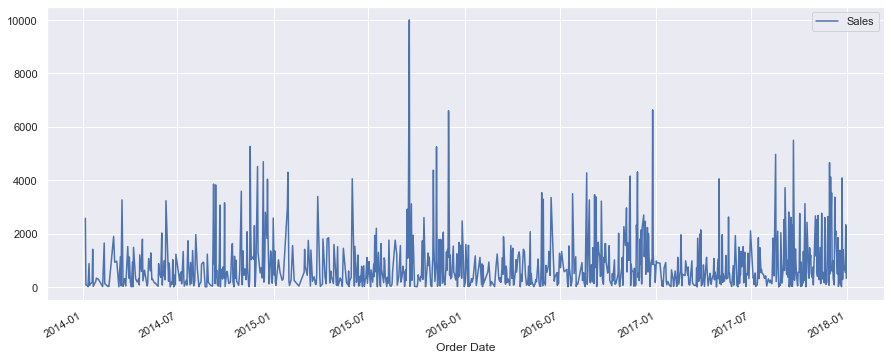

In [14]:
furniture.plot(figsize=(15, 6))
plt.show()

<a id='Sampling'></a>
## 4.2 Sampling

Ref: https://towardsdatascience.com/using-the-pandas-resample-function-a231144194c4

In [48]:
y = furniture['Sales'].resample('MS').mean() # MS = Monthly Start

In [49]:
y

Order Date
2014-01-01    480.19
2014-02-01    367.93
2014-03-01    857.29
2014-04-01    567.49
2014-05-01    432.05
2014-06-01    695.06
2014-07-01    601.17
2014-08-01    457.52
2014-09-01    992.35
2014-10-01    769.02
2014-11-01    980.22
2014-12-01   1532.30
2015-01-01    978.33
2015-02-01    522.40
2015-03-01    781.24
2015-04-01    805.82
2015-05-01    625.00
2015-06-01    428.57
2015-07-01    719.71
2015-08-01    602.41
2015-09-01   1382.79
2015-10-01    632.98
2015-11-01   1286.70
2015-12-01   1049.36
2016-01-01    508.18
2016-02-01    356.87
2016-03-01    609.58
2016-04-01    695.37
2016-05-01    687.27
2016-06-01    816.91
2016-07-01    768.74
2016-08-01    734.31
2016-09-01   1135.95
2016-10-01    624.87
2016-11-01   1271.35
2016-12-01   1410.72
2017-01-01    397.60
2017-02-01    528.18
2017-03-01    544.67
2017-04-01    453.30
2017-05-01    678.30
2017-06-01    826.46
2017-07-01    562.52
2017-08-01    857.88
2017-09-01   1209.51
2017-10-01    875.36
2017-11-01   1277.82
20

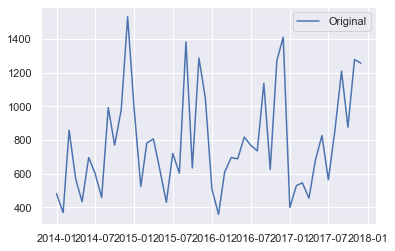

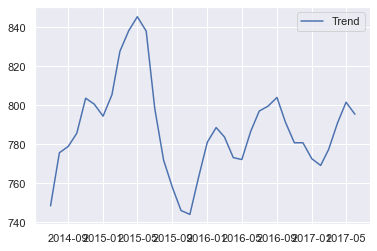

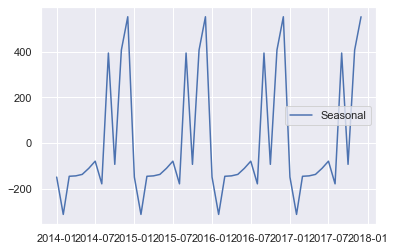

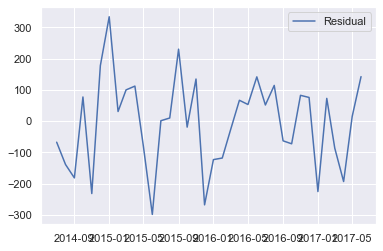

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The plot clearly indicates that the time series has seasonality pattern.The sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year</b>
                </font>
            </div>
        </td>
    </tr>
</table>



<a id='Checking_Stationarity'></a>
## 4.3 Checking Stationarity


Our first step in time-series analysis should be to check whether there is any evidence of a trend or seasonal effects and, if there is, remove them. Augmented Dickey-Fuller(ADF) statistics is one of the more widely used statistical test to check whether your time series is stationary or non-stationary. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.


**Null Hypothesis: The series has a unit root (value of a =1)(not stationary)**

**Alternate Hypothesis: The series has no unit root (stationary)**

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
#series = Series.from_csv('daily-total-female-births.csv', header=0)
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.191070
p-value: 0.000009
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>We can see that our statistic value of -4.756843 is less than the value of -3.578 at 1%. This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke). Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

The p-value is 0.000009, which is way below the threshold (0.05). Hence the null-hypothesis is rejected. It suggests the time series does not have a unit root, meaning it is stationary.</b>
                </font>
            </div>
        </td>
    </tr>
</table>



<a id='Decomposing'></a>
## 4.4 Decomposing

Decomposing the time series into three distinct components: trend, seasonality, and noise.

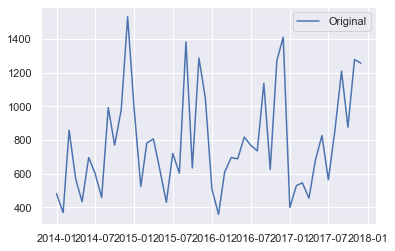

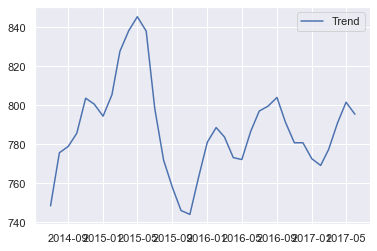

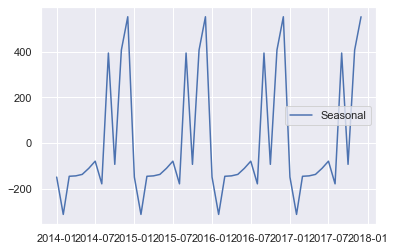

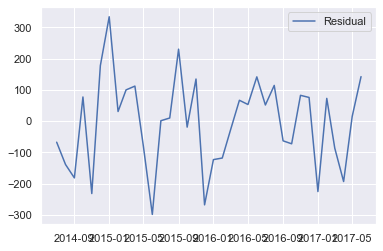

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>By visualizing the decomposed components of the original time series we can say that the price of stock is unstable, along with its obvious seasonality.</b>
                </font>
            </div>
        </td>
    </tr>
</table>




<a id='Time_Series_Forcasting_using_ARIMA'></a>
# 5. Time Series Forcasting using ARIMA

ARIMA is an acronym which stands for `Auto Regressive Integrated Moving Average` and is a way of modeling time-series data for forecasting and is specified by three order parameters (p,d,q):
* AR(p): pattern of growth/decline in the data is accounted for (Seasonality)
* I (d): rate of change of the growth/decline is accounted for (Trend)
* MA (q): noise between time points is accounted for (Residual)

Ref: https://people.duke.edu/~rnau/411arim.htm

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> We will use ARIMA for forecasting our time series. ARIMA is also denoted as ARIMA(p,d,q) where p,d,q accounts for seasonality, trend and noise in the time series data</b>
                </font>
            </div>
        </td>
    </tr>
</table>


In [21]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


<a id='Parameter_Selection'></a>
## 5.1 Parameter Selection 

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>We use “grid search” to find the optimal set of parameters that yields the best performance for our model</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
from pylab import rcParams
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
seasonal_order=param_seasonal,
enforce_stationarity=False, 
enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205915
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1428.931468885353
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170130920111


C:\Users\Jayanti\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.27028997936003
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.23144334183365
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1097.0479999356226
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341


C:\Users\Jayanti\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.24882803008137
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758101


C:\Users\Jayanti\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Jayanti\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2715.490480012894
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.56074298091437
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.6261389673287
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.60371537077367
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2580.9811045887695
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.9884876946865

C:\Users\Jayanti\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)



ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:291.8725576458952
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.8947668414504


C:\Users\Jayanti\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1289.707392382973
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.63785671402354
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:304.96712281679635
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.7889663004408
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1236.9300631040169
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109212
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:306.9113200151422
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:649.905617681688


C:\Users\Jayanti\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Jayanti\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2445.361252499469
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:458.8705548483014
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:279.5806233372343
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.18329774427525


C:\Users\Jayanti\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1081.1398714180025
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:310.75743684173585
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:281.5576621461245
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:692.1645522067713
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1492.1194104322008
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:479.46321478521355


C:\Users\Jayanti\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:304.20776751609355
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:480.9259367935209


C:\Users\Jayanti\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1289.551826592167
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:304.4664675084575
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:304.5842692143816
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:665.7794442186237


C:\Users\Jayanti\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2541.1015544402803
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:468.36851958133946
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:293.34221939659244
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.57633238770177


C:\Users\Jayanti\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:562.8326598540133
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:306.0156002107807
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:293.75131881115306
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:671.2513547541902
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1589.820862151307


C:\Users\Jayanti\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.2003422281135
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:300.2130611619098
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:475.3403658784316


C:\Users\Jayanti\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1322.4013756157137
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:300.6270901345406
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:302.3264992508105
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:649.0318019835448
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:835.7482170402568


C:\Users\Jayanti\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:460.476268761051
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:281.38730069393756
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:469.52503546608176


C:\Users\Jayanti\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2201.7719694671496
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:297.78754395454155
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:283.36610144371883


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>We are selecting those parameter which has minimum AIC score</b>
                </font>
            </div>
        </td>
    </tr>
</table>



<a id='Fitting_the_ARIMA'></a>
## 5.2 Fitting the ARIMA model

In [50]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                #enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000   1064.234     -0.001      0.999   -2086.860    2084.860
ma.S.L12      -1.0001   1064.299     -0.001      0.999   -2086.988    2084.988
sigma2      2.686e+04      0.002   1.46e+07      0.000    2.69e+04    2.69e+04


**Running model diagnostiscs to check any unusual behaviour**
<br>1. If the model is correctly specified and the parameter estimates are reasonably close to the true values, then the residuals should have nearly the properties of white noise.

<br>2. Plots can be used to better understand the distribution of errors beyond summary statistics. We would expect the forecast errors to be normally distributed around a zero mean.

<br>3. The Q-Q plot can be used to quickly check the normality of the distribution of residual errors.

<br>4. Finally, visualizing the autocorrelation for the residual errors. The x-axis shows the lag and the y-axis shows the correlation between an observation and the lag variable, where correlation values are between -1 and 1 for negative and positive correlations respectively. We would not expect there to be any correlation between the residuals. This would be shown by autocorrelation scores being below the threshold of significance (dashed and dotted horizontal lines on the plot).

In [51]:
results

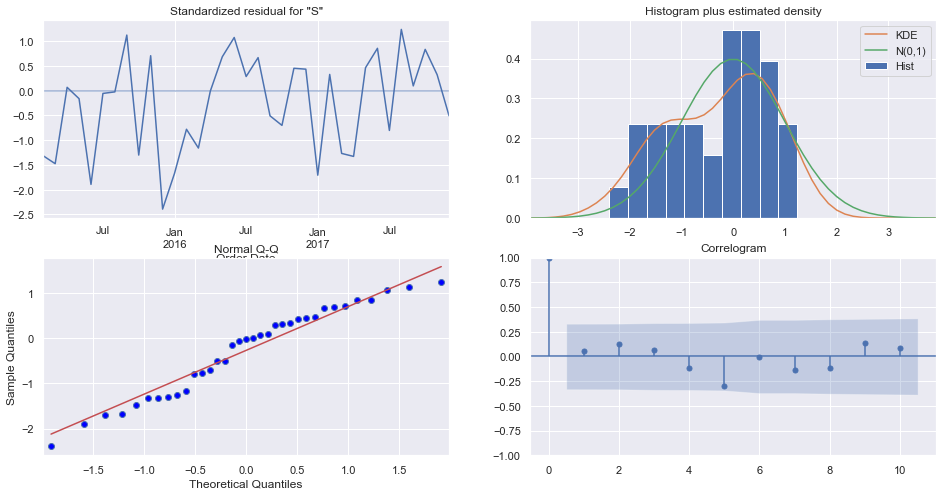

In [52]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The model diagnostics indicates that the model residuals are near normally distributed</b>
                </font>
            </div>
        </td>
    </tr>
</table>




<a id='Validating_Forecasts'></a>
## 5.3 Validating Forecasts

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>We compare predicted sales to real sales of the time series to understand the accuracy of our forecasts</b>
                </font>
            </div>
        </td>
    </tr>
</table>

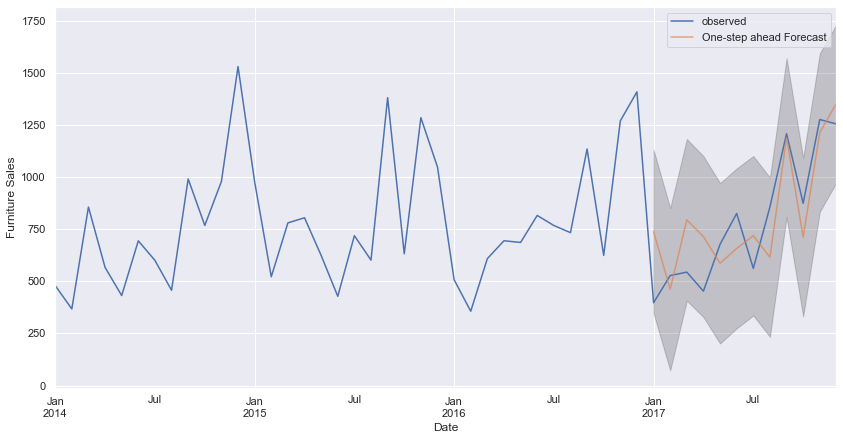

In [53]:
#set forecasts to start at 2017–01–01 to the end of the data to forecast
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()s

The above plot indicates the observed value and the rolling forecast predications (A rolling forecast is an add/drop process for predicting the future over a set period of time). The predicated values align well with the true values.

<a id="Calculating_MSE_and_RMSE"> </a>
## 5.4 Calculating MSE and RMSE


In [31]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 34904.03
The Root Mean Squared Error of our forecasts is 186.83


In [54]:
# (0,1,1) x (0,1,1,12)
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 34370.12
The Root Mean Squared Error of our forecasts is 185.39


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>MSE measures the average of the squares of the errors of an estimator i.e. the average squared difference between the estimated values and what is estimated. RMSE tells us that our model was able to forecast the average daily furniture sales in the test set within 160.34 of the real sales..</b>
                </font>
            </div>
        </td>
    </tr>
</table>



<a id="Visualizing_the_Forecast"> </a>
## 5.5 Visualizing the Forecast 


            lower Sales  upper Sales
2018-01-01       250.48      1000.54
2018-02-01       116.19       872.71
2018-03-01       359.96      1116.86
2018-04-01       291.95      1048.89
2018-05-01       275.40      1032.34
2018-06-01       363.46      1120.40
2018-07-01       327.35      1084.29
2018-08-01       338.75      1095.69
2018-09-01       842.47      1599.41
2018-10-01       403.48      1160.43
2018-11-01       869.50      1626.58
2018-12-01       964.04      1721.83
2019-01-01       260.07      1052.38


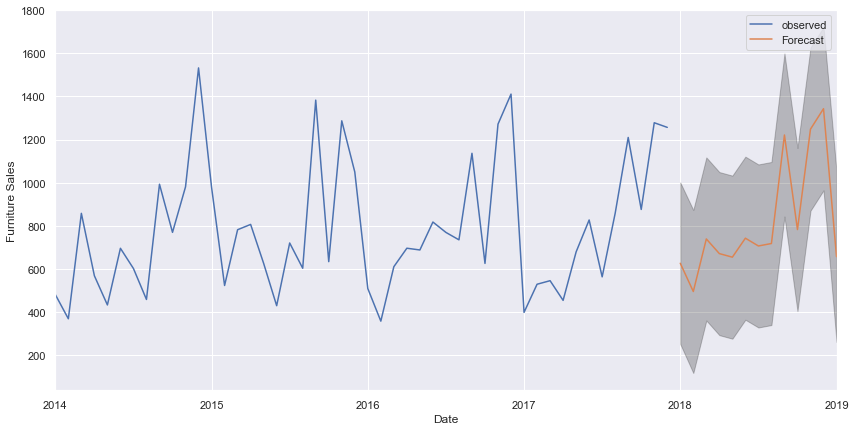

In [32]:
pred_uc = results.get_forecast(steps=13)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
print(pred_ci)
plt.legend()
plt.show()

<a id="Conclusion"> </a>
# Conclusion

We observe that sales of furniture produces seasonal pattern. Early of the year is the off season for furniture sales in the superstore. The sales for furniture increases linearly over time.